In [1]:
%matplotlib inline

In [3]:
import sys
import pathlib

sys.path.append(str(pathlib.Path(__name__).resolve().parent))  # noqa

In [10]:
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
from metrikai import cleanup

(1887, 2345)


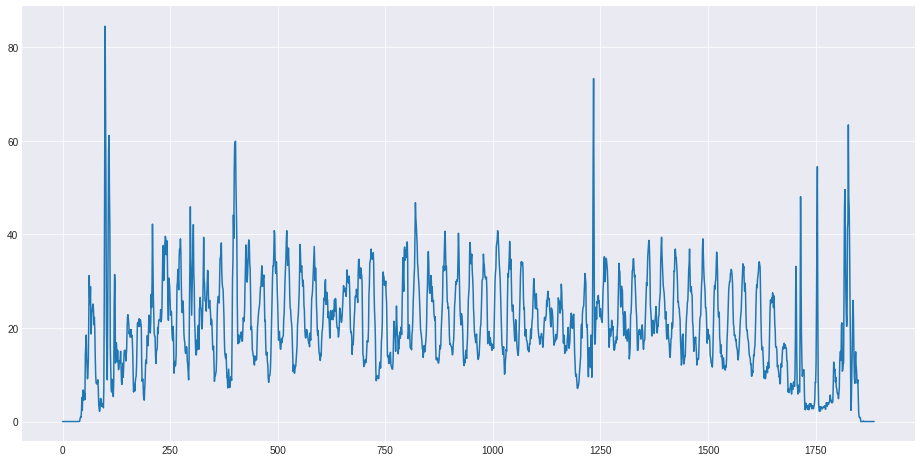

In [14]:
im = cleanup(cv.imread('samples/epaveldas/ru/001/004.jpg', cv.IMREAD_GRAYSCALE))
ih, iw = im.shape

imx = cv.cvtColor(im.copy(), cv.COLOR_GRAY2BGR)
imx[::25, :] = (64, 64, 64)
cv.imshow('im', imx)

print(im.shape)
mpl.rc('figure', figsize=(16, 8))
mpl.style.use('seaborn-darkgrid')
plt.plot(im.mean(axis=1))
plt.show()

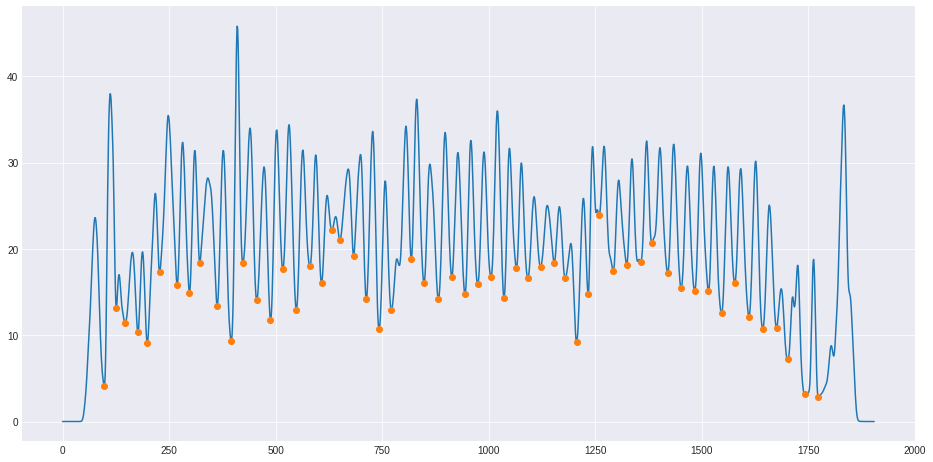

In [65]:
import numpy as np
from scipy import signal

x = im.mean(axis=1)
# plt.plot(x)

win = signal.hann(20)
y = signal.convolve(x, win) / sum(win)
plt.plot(y)

minimums = signal.argrelextrema(y, np.less, order=10)[0]
plt.plot(minimums, y[minimums], 'o')
plt.show()

In [43]:
len(signal.argrelextrema(y, np.less, order=20)[0]), len(np.diff(signal.argrelextrema(y, np.less, order=20)[0]))

(50, 49)

In [42]:
signal.argrelextrema(y, np.less, order=20)[0]

array([  98,  147,  199,  228,  269,  298,  322,  363,  396,  423,  456,
        488,  517,  549,  580,  608,  651,  683,  713,  743,  772,  819,
        848,  882,  914,  945,  974, 1006, 1036, 1065, 1092, 1122, 1154,
       1207, 1234, 1293, 1324, 1357, 1383, 1420, 1452, 1484, 1516, 1547,
       1578, 1611, 1644, 1702, 1742, 1774])

In [40]:
np.diff(signal.argrelextrema(y, np.less, order=20)[0])

array([49, 52, 29, 41, 29, 24, 41, 33, 27, 33, 32, 29, 32, 31, 28, 43, 32,
       30, 30, 29, 47, 29, 34, 32, 31, 29, 32, 30, 29, 27, 30, 32, 53, 27,
       59, 31, 33, 26, 37, 32, 32, 32, 31, 31, 33, 33, 58, 40, 32])

In [46]:
np.diff(signal.argrelextrema(y, np.less, order=10)[0]).mean()

30.472727272727273

In [48]:
np.diff(signal.argrelextrema(y, np.less, order=10)[0]).std()

4.7476483957066788

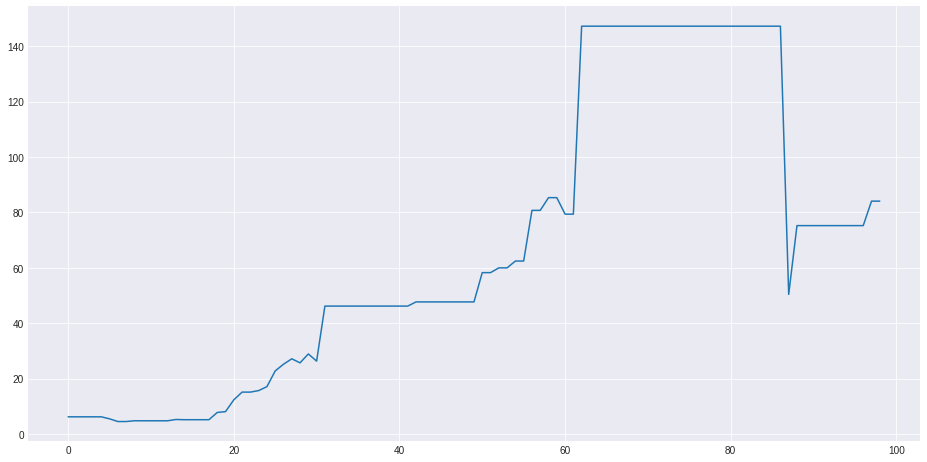

In [51]:
plt.plot([np.diff(signal.argrelextrema(y, np.less, order=i)[0]).std() for i in range(1, 100)])
plt.show()

In [53]:
int(round(min([np.diff(signal.argrelextrema(y, np.less, order=i)[0]).std() for i in range(1, 100)])))

4

In [ ]:
cv.destroyAllWindows()